In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

# GoogleDrive path
cur_path = Path('/content/gdrive/MyDrive/emotion-detection/data/train')

In [ ]:
# resize the image into 48x48
pic = DataBlock(
    blocks = (ImageBlock, CategoryBlock), 
    get_items = get_image_files, 
    get_y = parent_label,
    item_tfms = Resize(48),
    batch_tfms = aug_transforms(size=224))

In [ ]:
# data loading & resizing
data = pic.dataloaders(cur_path)

In [ ]:
dataTrain = data.train_ds.items[:-1]
dataValid = data.valid_ds.items[:-1]

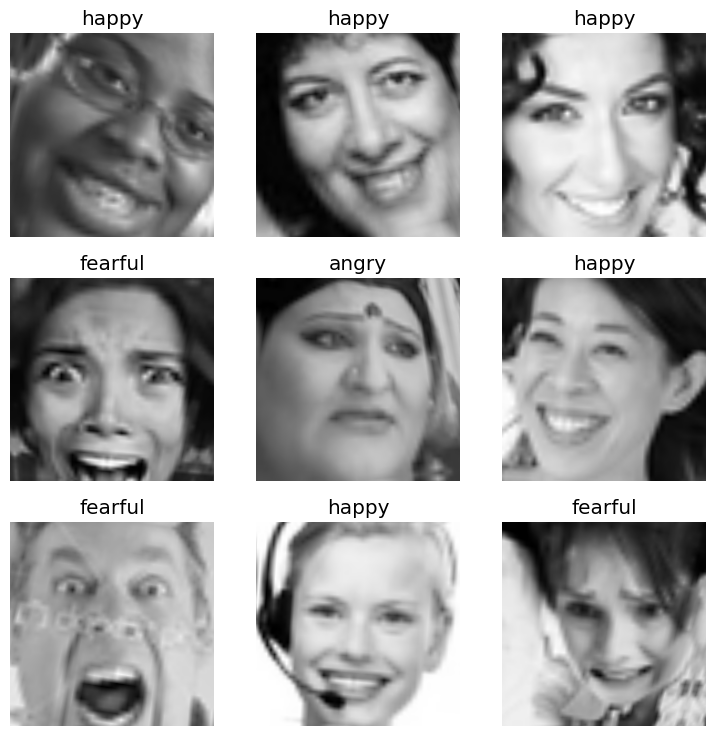

In [ ]:
data.show_batch()

In [ ]:
model = cnn_learner(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pt

In [ ]:
model.fine_tune(8, 0.003)

epoch,train_loss,valid_loss,error_rate,time
0,1.612564,1.429408,0.557305,1:05:37


epoch,train_loss,valid_loss,error_rate,time
0,1.125007,1.018951,0.390343,02:16
1,1.032896,0.999754,0.379731,02:14
2,0.980098,0.946348,0.361160,02:13
3,0.909194,0.900973,0.339229,02:15
4,0.790587,0.880625,0.328263,02:13
5,0.687464,0.834210,0.302441,02:14
6,0.557849,0.851364,0.293951,02:13
7,0.477660,0.865931,0.298550,02:12


In [ ]:
interp = Interpretation.from_learner(model)

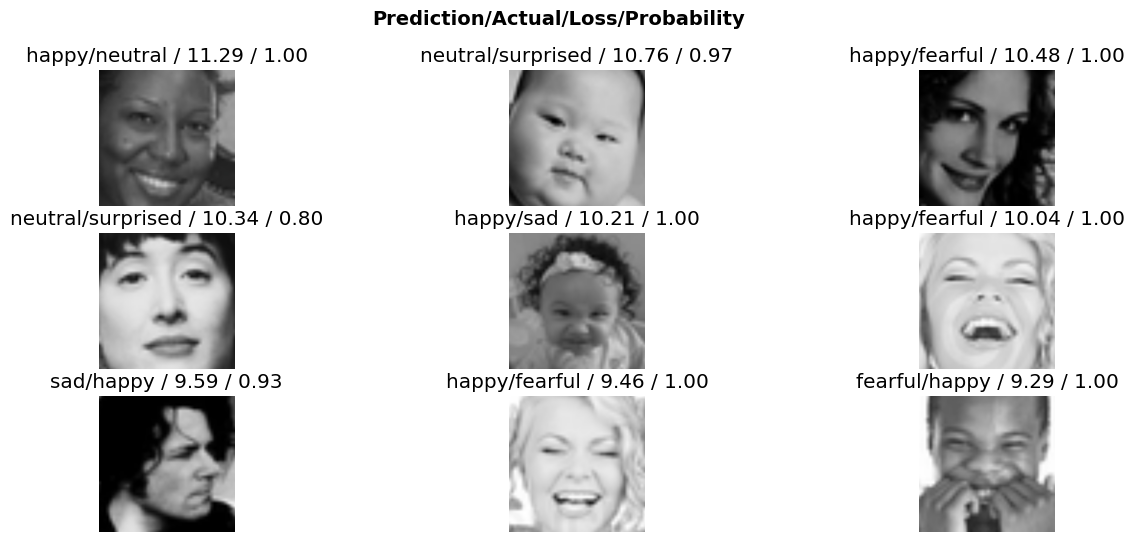

In [ ]:
interp.plot_top_losses(9, figsize = (15,6))

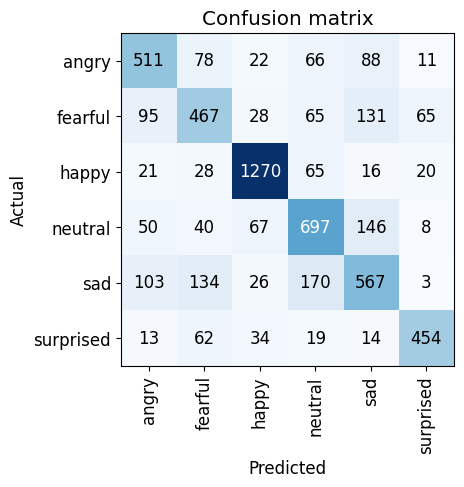

In [ ]:
interp_class = ClassificationInterpretation.from_learner(model)
interp_class.plot_confusion_matrix()

In [ ]:
import os
cur_path = "/content/gdrive/MyDrive/emotion-detection/"
os.chdir(cur_path)

In [ ]:
model.export("resnet-50.pkl")